**Installing libraries**

In [ ]:
!pip install matplotlib
!pip install numpy

### Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Creating random vectors x and y


n is length of the vectors


In [2]:
n = 5

Generating Random vectors from Gaussian distribution by numpy random library by assigning size variable

In [3]:
x, y = np.random.standard_normal(size=(n, 1)), np.random.standard_normal(size=(n, 1))

### Plotting the random graph 

* Add extra point that is copy of first point to make the last edge $(x_n, y_n) - (x_1, y_1)$
* Use the `plt.plot` to plot line chart aka edges
* Use markers to plot points

In [4]:
x, y = np.concat([x, x[:1]], axis=0), np.concat([y, y[:1]], axis=0)

In [10]:
import matplotlib as mpl
from typing import Tuple

In [ ]:
def plot_graph(X:np.array, Y:np.array, ax:mpl.axes.Axes/, xlim: Tuple[int, int]=None, ylim:Tuple[int, int]=None, i:int=None):
    ax.plot(X, Y)
    ax.plot(X, Y, 'r+')
    if(xlim is not None):
        ax.set_xlim(xlim)
    if(ylim is not None):
        ax.set_ylim(ylim)
    ax.set_title(f'Random Graph for n={n}' + f' Iteration no. {i}'if i is not None else '')

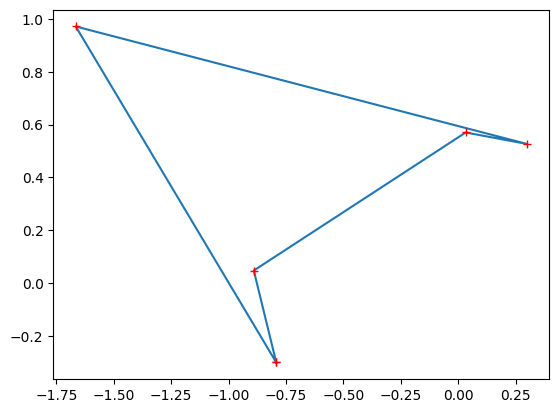

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_graph(x, y, ax)
plt.show()

In [13]:
def new_graph(xs:np.array, ys:np.array)->Tuple[np.array, np.array]:
    new_x, new_y = np.concat([np.mean([xs[i], xs[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0), np.concat([np.mean([ys[i], ys[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0)
    return np.concat([new_x, new_x[:1]], axis=0), np.concat([new_y, new_y[:1]], axis=0)

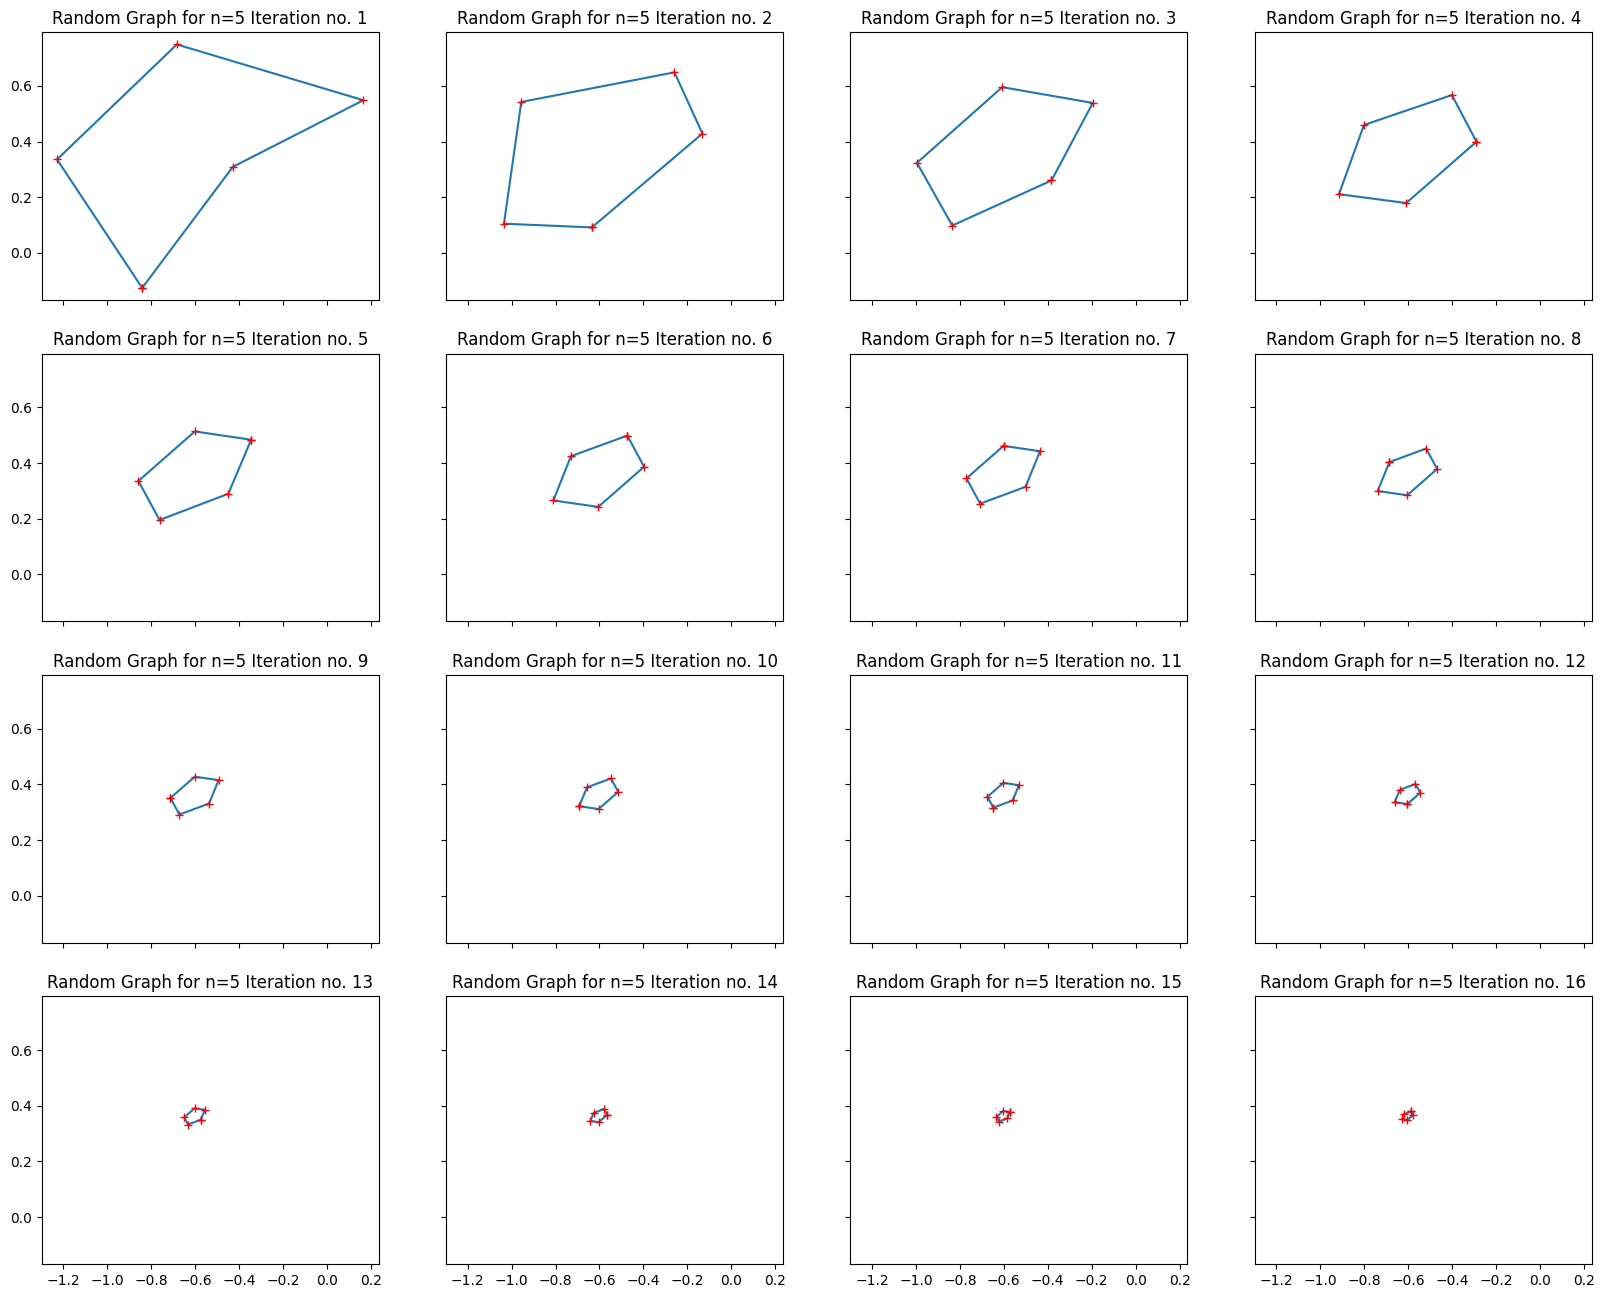

In [16]:
new_x, new_y = new_graph(x, y)
fig, axs = plt.subplots(4, 4, sharex='all', sharey='all', figsize=(20, 16))
axs = axs.flatten()
for i in range(16):
    plot_graph(new_x, new_y, axs[i], i=i+1)
    new_x, new_y = new_graph(new_x, new_y)
plt.show()

In [17]:
def new_graph_normalized(xs:np.array, ys:np.array)->Tuple[np.array, np.array]:
    new_x, new_y = np.concat([np.mean([xs[i], xs[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0), np.concat([np.mean([ys[i], ys[i + 1]]).reshape((-1, 1)) for i in range(n)], axis=0)
    # normalization
    norm_x, norm_y = np.linalg.vector_norm(new_y), np.linalg.vector_norm(new_y)
    new_x, new_y = (new_x / norm_x if norm_x > 0.0 else new_x), (new_y / norm_y if norm_y > 0.0 else new_y)
    return np.concat([new_x, new_x[:1]], axis=0), np.concat([new_y, new_y[:1]], axis=0)

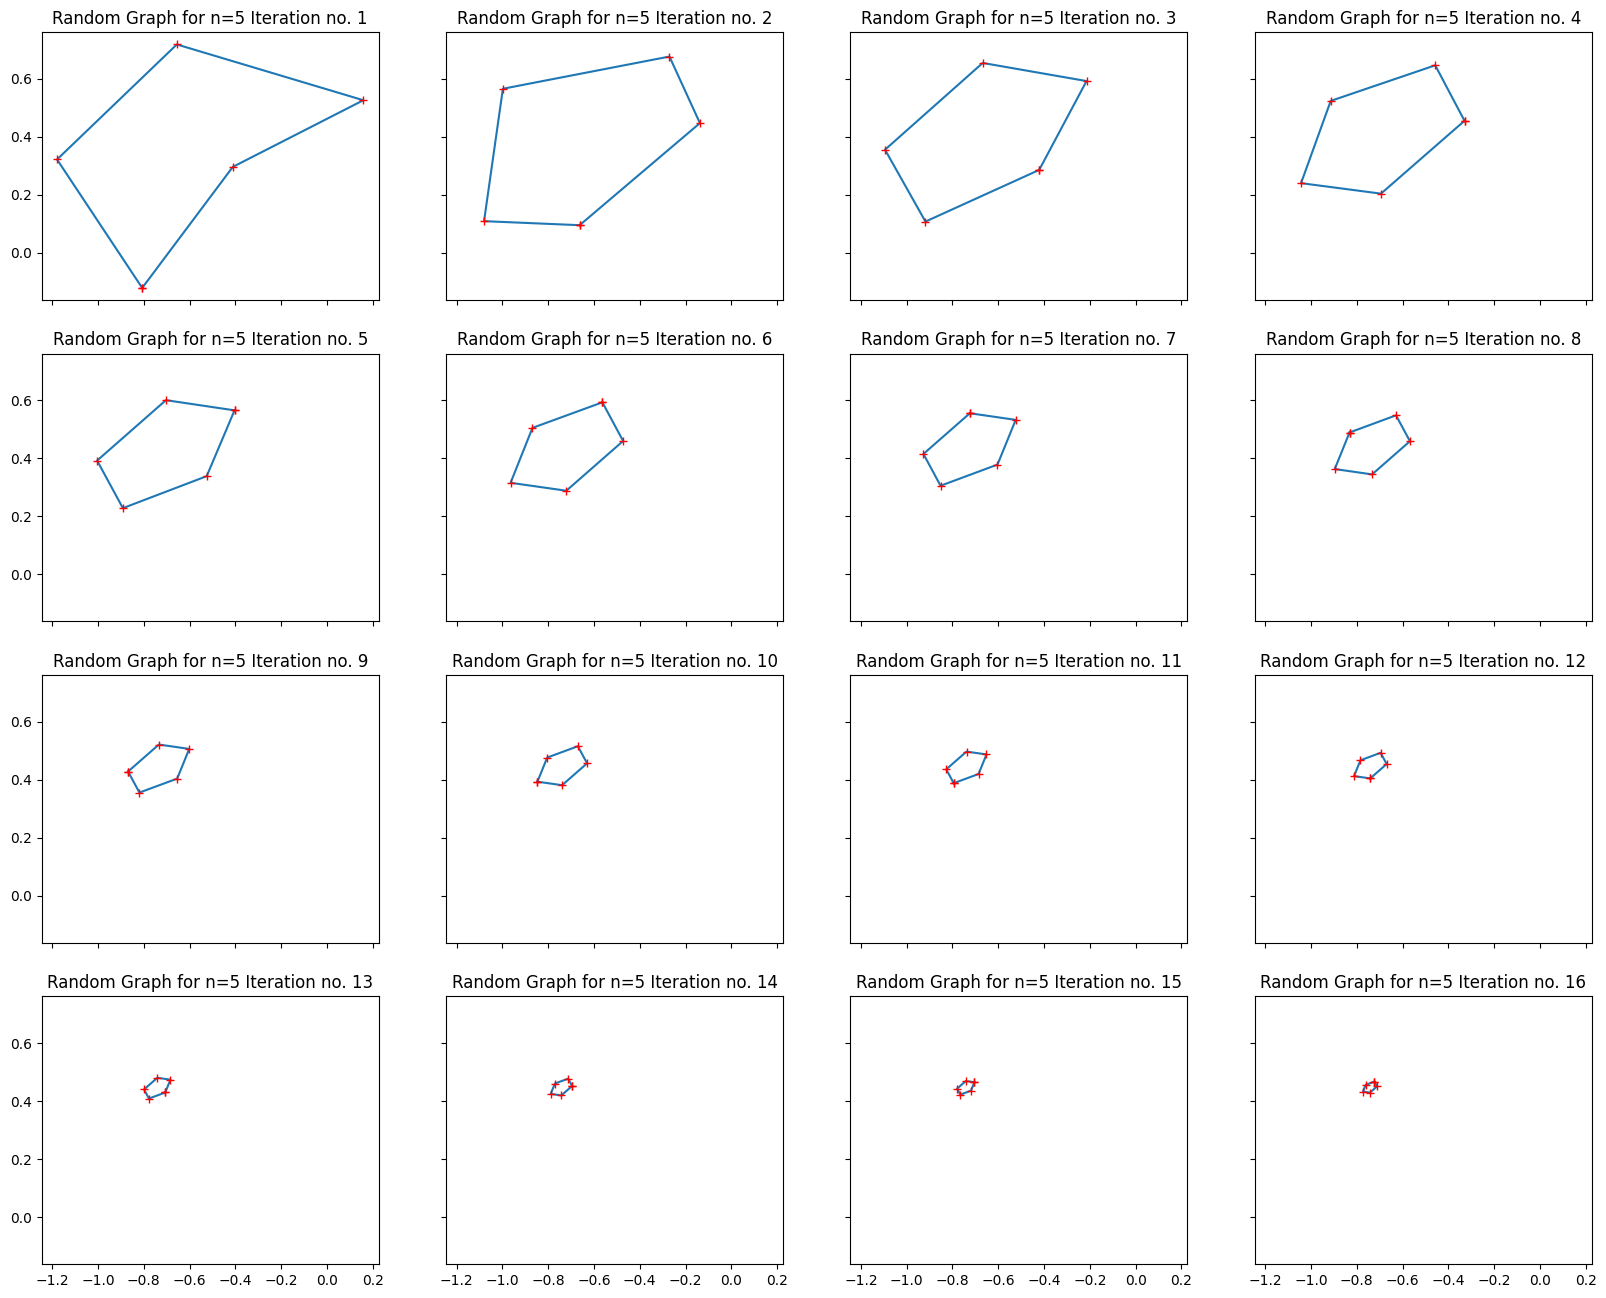

In [18]:
new_x, new_y = new_graph_normalized(x, y)
fig, axs = plt.subplots(4, 4, sharex='all', sharey='all', figsize=(20, 16))
axs = axs.flatten()
for i in range(16):
    plot_graph(new_x, new_y, axs[i], i=i+1)
    new_x, new_y = new_graph_normalized(new_x, new_y)
plt.show()

### Calculate convergence

Calculate number of iterations it takes to converge

In [20]:
max_iterations = 1e9
acceptable_error = 1e-15

In [21]:
old_x, old_y = x, y
for i in range(int(max_iterations)):
    new_x, new_y = new_graph(old_x, old_y)
    if(np.linalg.vector_norm(new_x - old_x) + np.linalg.vector_norm(new_y - old_y) < acceptable_error):
        print(f"Converges in {i+1} iterations")
        break
    old_x, old_y = new_x, new_y

Converges in 166 iterations


In [22]:
old_x, old_y = x, y
for i in range(int(max_iterations)):
    new_x, new_y = new_graph_normalized(old_x, old_y)
    if(np.linalg.vector_norm(new_x - old_x) + np.linalg.vector_norm(new_y - old_y) < acceptable_error):
        print(f"Converges in {i+1} iterations")
        break
    old_x, old_y = new_x, new_y

Converges in 167 iterations


**Converged Graph**

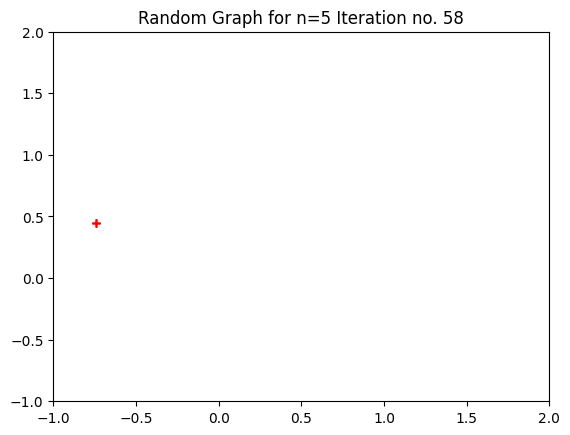

In [25]:
ax = plt.subplot(111)
plot_graph(old_x, old_y, ax, i=58)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

**Converged Point**

In [26]:
np.mean(old_x, axis=0), np.mean(old_y, axis=0)

(array([-0.74272778]), array([0.4472136]))

### Conclusion

After each iteration it gets smaller and smaller and rotates, until it converges to one point

### Matrix of transfromation

It's $A=\begin{bmatrix}0.5&0.5&0&...&0\cr0&0.5&0.5&...&0\cr.&.&.&...&.\cr.&.&.&...&.\cr.&.&.&...&.\cr0.5&0&0&...&0.5\end{bmatrix}$

Define Matrix

In [ ]:
row = np.array([np.float64(0.5), np.float64(0.5)] + [np.float64(0) for i in range(n - 2)], dtype='float').reshape(1, -1)
A = np.concat([np.roll(row, i) for i in range(n + 1)], dtype='float', axis=0)
b
A

array([[0.5, 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0.5, 0. ],
       [0.5, 0. , 0. , 0. , 0.5, 0. ],
       [0.5, 0.5, 0. , 0. , 0. , 0. ]])

In [58]:
def matrix_transformation(Xs: np.array, Ys: np.array):
    return np.linalg.matmul(A, Xs), np.linalg.matmul(A, Ys)

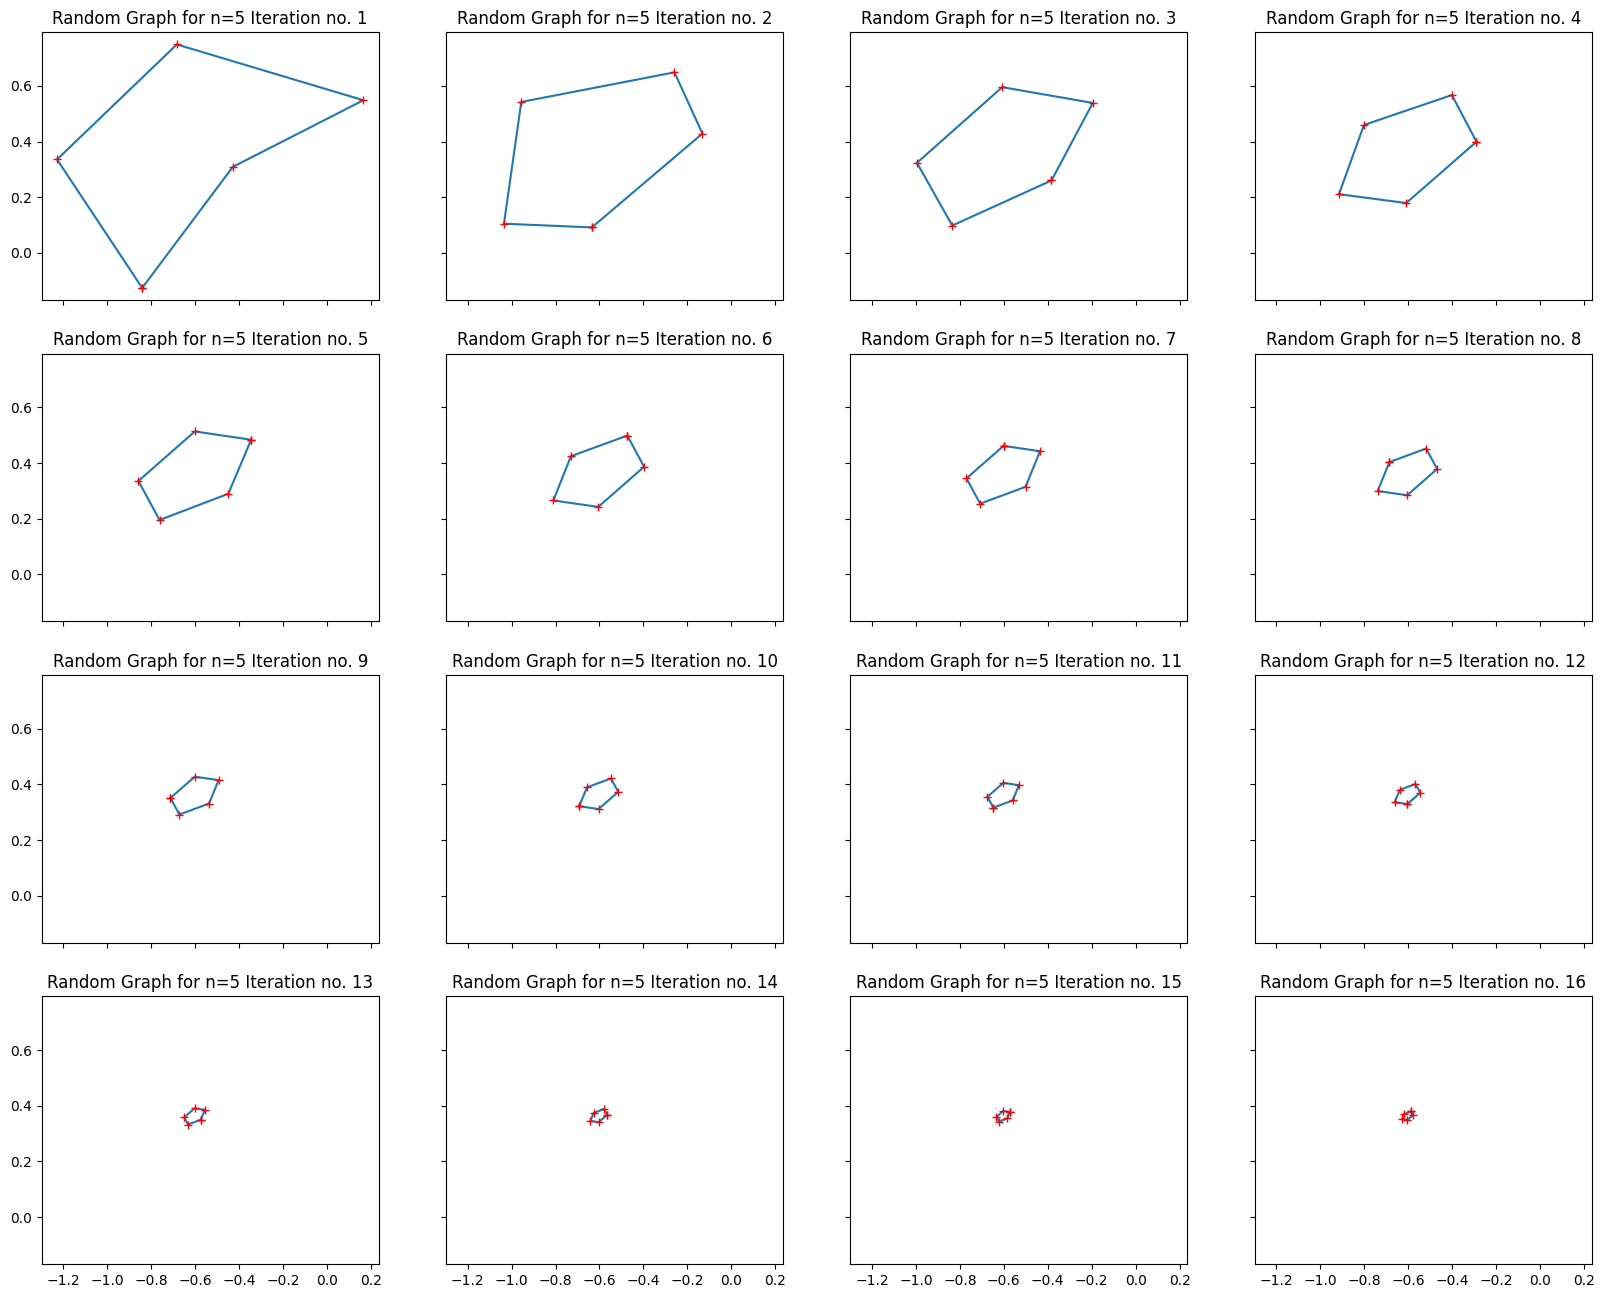

In [59]:
new_x, new_y = matrix_transformation(x, y)
fig, axs = plt.subplots(4, 4, sharex='all', sharey='all', figsize=(20, 16))
axs = axs.flatten()
for i in range(16):
    plot_graph(new_x, new_y, axs[i], i=i+1)
    new_x, new_y = matrix_transformation(new_x, new_y)
plt.show()

#### Singular Vectors of A


In [62]:
singular_vecs = np.linalg.svd(A[:n, :n])
singular_vecs.Vh, singular_vecs.S

(array([[-0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 , -0.4472136 ],
        [ 0.63245553,  0.19543951, -0.51166727, -0.51166727,  0.19543951],
        [ 0.        ,  0.60150096,  0.37174803, -0.37174803, -0.60150096],
        [ 0.        , -0.37174803,  0.60150096, -0.60150096,  0.37174803],
        [-0.63245553,  0.51166727, -0.19543951, -0.19543951,  0.51166727]]),
 array([1.        , 0.80901699, 0.80901699, 0.30901699, 0.30901699]))

### Inverse transformation

In [67]:
A_inverse = np.linalg.inv(A[:n, :n])
A_inverse = np.concat([A_inverse, A_inverse[:1]], dtype='float')
A_inverse = np.concat([A_inverse, np.zeros((n + 1, 1), dtype='float')], dtype=float, axis=1)
A_inverse

array([[ 1., -1.,  1., -1.,  1.,  0.],
       [ 1.,  1., -1.,  1., -1.,  0.],
       [-1.,  1.,  1., -1.,  1.,  0.],
       [ 1., -1.,  1.,  1., -1.,  0.],
       [-1.,  1., -1.,  1.,  1.,  0.],
       [ 1., -1.,  1., -1.,  1.,  0.]])

In [68]:
def inverse_transformation(Xs: np.array, Ys: np.array):
    return np.linalg.matmul(A_inverse, Xs), np.linalg.matmul(A_inverse, Ys)

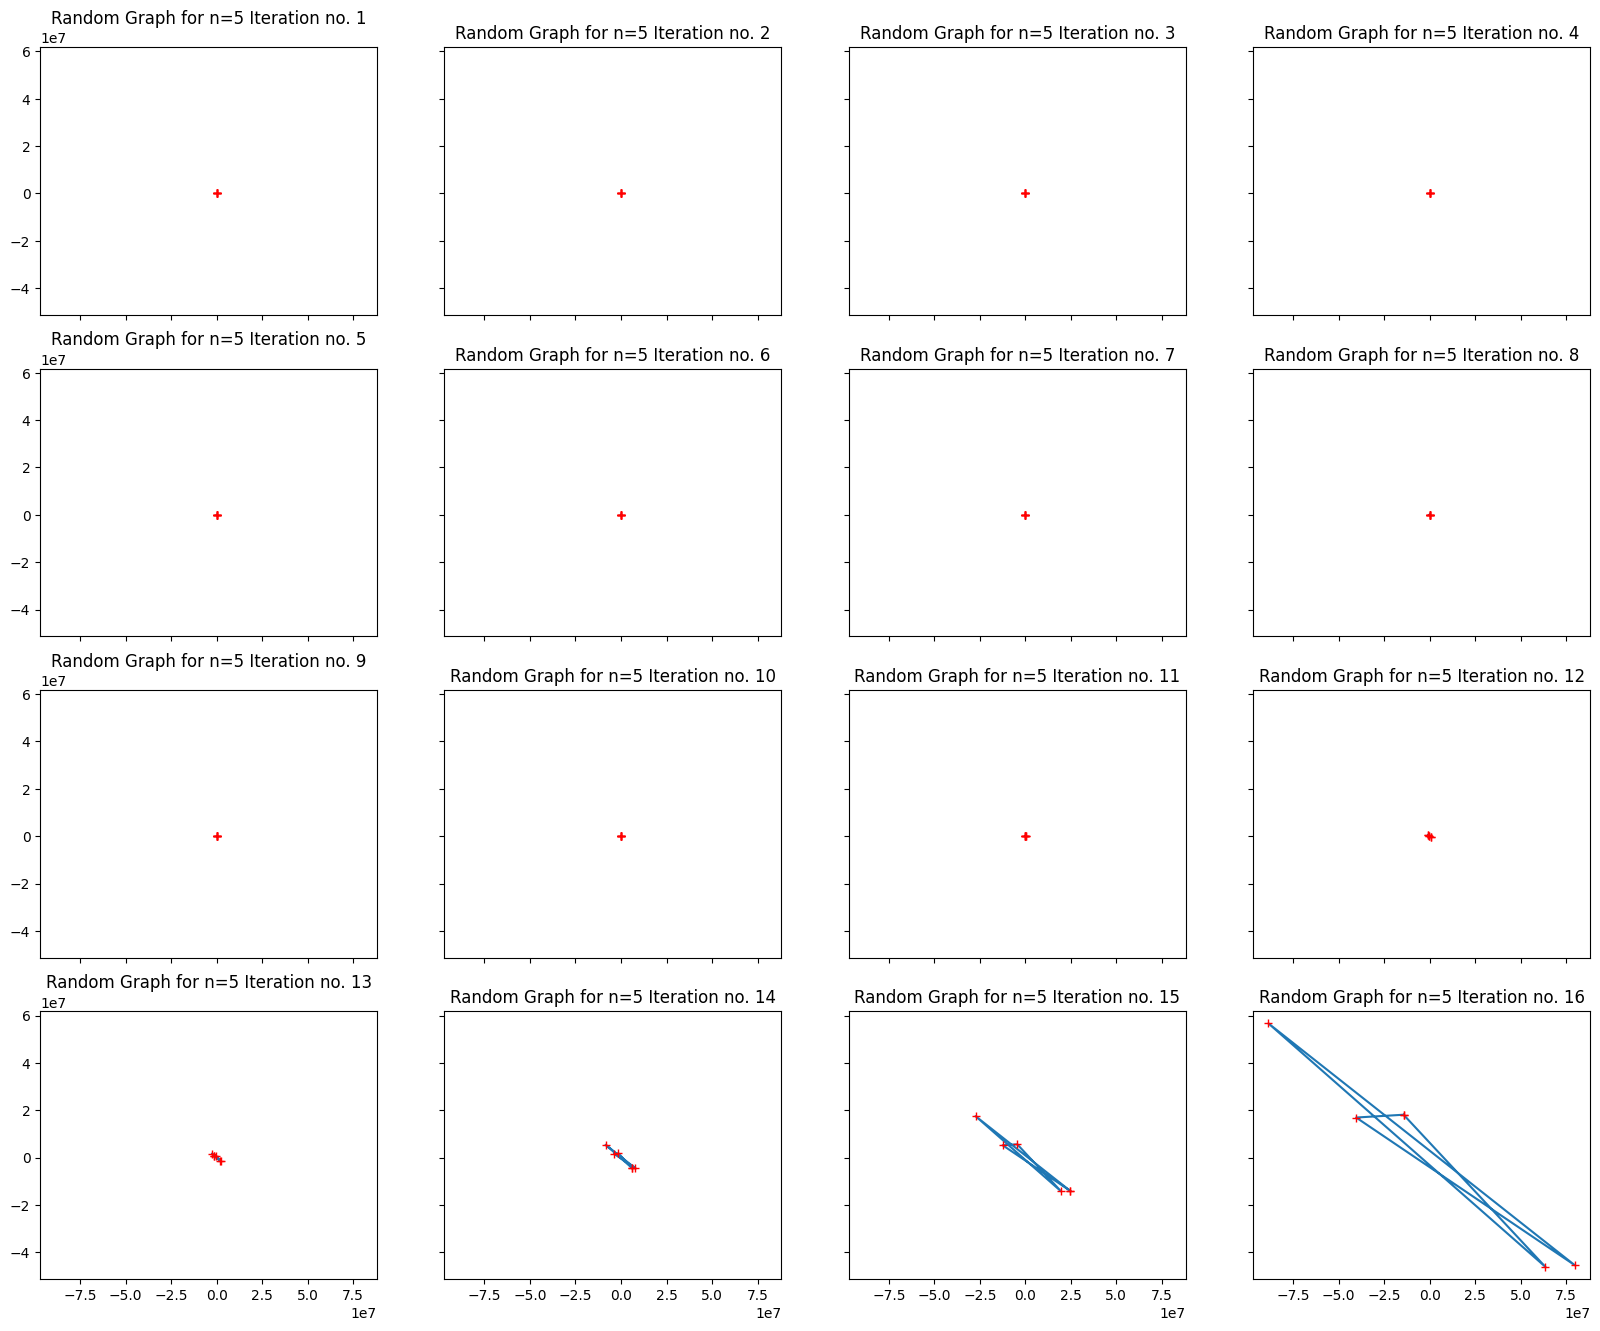

In [69]:
new_x, new_y = inverse_transformation(x, y)
fig, axs = plt.subplots(4, 4, sharex='all', sharey='all', figsize=(20, 16))
axs = axs.flatten()
for i in range(16):
    plot_graph(new_x, new_y, axs[i], i=i+1)
    new_x, new_y = inverse_transformation(new_x, new_y)
plt.show()

### Conclusion

It explodes to convex shape (it's) original shape